In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
import qgrid
def show_df(df):
    return qgrid.show_grid(
        df,
        show_toolbar = True,
        grid_options = {
            'forceFitColumns':False,
            'editable':False
        }
    )

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.feature_selection import f_regression

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
random_state = 42

In [5]:
df = pd.read_csv('Data/data_for_model.csv')

In [6]:
df.shape

(18903, 97)

In [7]:
df.head()

mobile  actual_salary  derived_salary_3  user_id  date_created  \
0  6001334208        31770.0           34482.0  2144882      20190224   
1  6281271452        24450.0               0.0  2055334      20190224   
2  6281424193        45565.0           45565.0  2243648      20190224   
3  6281539395        21050.0               0.0  2201656      20190224   
4  6281622726        27518.0               0.0  2074021      20190224   

   day_segment  bank_debit_amount_sum  bank_debit_amount_max  \
0          180              446979.00                30000.0   
1          180               99668.52                13000.0   
2          180               64522.00                13000.0   
3          180              129266.00                50000.0   
4          180               70989.51                10000.0   

   bank_debit_amount_min  bank_debit_amount_avg  ...  last_sms_date  \
0                  32.00            4026.837838  ...       20190126   
1                  19.00            1812.154909  ...       20190131   
2                 100.00            2081.354839  ...       20190215   
3                   2.48            6155.523810  ...       20190206   
4                  50.00            1478.948125  ...       20190114   

   bank_sms_count  smsAffluenceScore  smsRiskScore  smsQualityScore  \
0             590               34.0     50.000000        80.952381   
1             175               44.8     50.000000       100.000000   
2              81               45.2     36.666667        74.603175   
3             261               32.8     50.000000       100.000000   
4             104               16.8      6.666667        80.952381   

   total_amount  day_count  monthly_spent  mean_prediction_fit  \
0           NaN        NaN            NaN          26330.23975   
1       3426.00      194.0     529.793814          23271.71849   
2       1379.95      208.0     199.031250          38887.86298   
3        225.00      434.0      15.552995          20597.42757   
4       2462.79      317.0     233.071609          22902.77672   

   zero_prediction_fit  
0          40897.19764  
1          41376.61153  
2          44451.13048  
3          38347.11575  
4          36292.43808  

[5 rows x 97 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 97 columns):
mobile                                            18903 non-null int64
actual_salary                                     18903 non-null float64
derived_salary_3                                  18903 non-null float64
user_id                                           18903 non-null int64
date_created                                      18903 non-null int64
day_segment                                       18903 non-null int64
bank_debit_amount_sum                             18049 non-null float64
bank_debit_amount_max                             18049 non-null float64
bank_debit_amount_min                             18049 non-null float64
bank_debit_amount_avg                             18049 non-null float64
bank_debit_count                                  18903 non-null int64
bank_credit_amount_sum                            16370 non-null float64
bank_credit_amount_max   

In [9]:
with pd.option_context('display.max_columns',100):
    print(df.describe())

             mobile  actual_salary  derived_salary_3       user_id  \
count  1.890300e+04   1.890300e+04      1.890300e+04  1.890300e+04   
mean   9.116442e+09   5.579650e+04      6.331652e+04  1.609353e+06   
std    8.595934e+08   2.626322e+05      2.689226e+06  5.215882e+05   
min    6.001334e+09   2.000100e+04      0.000000e+00  1.983000e+03   
25%    8.553898e+09   2.834717e+04      0.000000e+00  1.252544e+06   
50%    9.505495e+09   4.047060e+04      0.000000e+00  1.691187e+06   
75%    9.833965e+09   6.410120e+04      5.112300e+04  2.046045e+06   
max    9.999998e+09   3.552600e+07      3.527314e+08  2.290085e+06   

       date_created  day_segment  bank_debit_amount_sum  \
count       18903.0      18903.0           1.804900e+04   
mean     20190224.0        180.0           1.168106e+06   
std             0.0          0.0           1.027202e+08   
min      20190224.0        180.0           1.000000e+00   
25%      20190224.0        180.0           3.450000e+04   
50%      201902

In [10]:
non_useful_columns = [
    'mobile', 'actual_salary', 'derived_salary_3', 'user_id', 'date_created', 'day_segment',
    'total_sms_count', 'first_sms_date', 'last_sms_date', 'bank_sms_count', 'day_count',
    'mean_prediction_fit', 'zero_prediction_fit'
]

In [11]:
useful_columns = [
    'bank_debit_amount_sum', 'bank_credit_amount_sum' , 'cc_debit_amount_sum',
    'cc_credit_amount_sum',  'bank_balance_avg', 'cc_payment_recieved_sum', 
    'dc_atm_withdrawal_sum', 'airline_ticket_count', 'telecom_postpaid_bill_count', 
    'food_bill_amount_sum', 'insufficient_credit_count', 'electricity_bill_overdue_count', 
    'gas_bill_overdue_count','atm_withdrawal_failiure_insufficient_bal_count',
    'cheque_bounce_count', 'transaction_reversal_count', 'emi_amount_overdue_count', 'bank_salary_credit_amount_sum']

In [12]:
y = df.actual_salary

In [13]:
y[y>100000] = 100000

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
X = df[useful_columns]

In [15]:
X = df.drop(non_useful_columns, axis=1)

In [16]:
X

bank_debit_amount_sum  bank_debit_amount_max  bank_debit_amount_min  \
0                  446979.00               30000.00                  32.00   
1                   99668.52               13000.00                  19.00   
2                   64522.00               13000.00                 100.00   
3                  129266.00               50000.00                   2.48   
4                   70989.51               10000.00                  50.00   
5                   93649.71               20000.00                 500.00   
6                   21860.00                5465.00                5465.00   
7                      22.00                  11.00                  11.00   
8                    6871.00                 580.00                  49.00   
9                   95675.00               12928.00                   1.00   
10                  13500.00               10000.00                 500.00   
11                  57400.00               11000.00                 200.00   
12                       NaN                    NaN                    NaN   
13                  46260.08               18000.00                   2.00   
14                  43826.09                6000.00                   1.00   
15                  25000.00               10000.00                5000.00   
16                 290898.97               88000.00                   1.00   
17                 338331.00               30000.00                  10.00   
18                 116873.26               20000.00                   1.00   
19                 254532.20               17000.00                   1.00   
20                   6600.00                5000.00                 600.00   
21                  66803.00               14093.00                 500.00   
22                  83433.98               21500.00                   1.00   
23                 594954.37              120000.00                  10.00   
24                  17594.33               10000.00                  85.33   
25                 118532.00               23000.00                 100.00   
26                  15000.00               10000.00                2500.00   
27                  54473.40               23516.00                 150.00   
28                 190310.00               50000.00                 400.00   
29                 770749.14              200000.00                   1.00   
...                      ...                    ...                    ...   
18873              130260.00               14000.00                  50.00   
18874               97400.00               52000.00                2000.00   
18875               24100.00               10000.00                 600.00   
18876              413674.01              100000.00                5702.39   
18877               62077.39               19257.00                   9.00   
18878              127743.63               10000.00                   9.44   
18879              268633.22               51125.00                  15.00   
18880               16976.00                7000.00                  35.00   
18881              110916.00               35000.00                  12.00   
18882              168976.60               50000.00                   1.00   
18883             1098489.46               96000.00                 100.00   
18884               44155.00               10000.00                 500.00   
18885              173813.07               36156.64                  11.80   
18886              158488.00               15000.00                 100.00   
18887               58086.31               35892.13                 152.00   
18888              155023.07               20000.00                   1.00   
18889               95235.84               18000.00                  17.00   
18890               40495.00               10000.00                  50.00   
18891              100268.00               49600.00                 100.00   
18892                    NaN 

In [17]:
df['first_sms_date_clean'] = pd.to_datetime(df.first_sms_date.astype(str), format='%Y%m%d')

In [18]:
df['last_sms_date_clean'] = pd.to_datetime(df.last_sms_date.astype(str), format='%Y%m%d')

In [19]:
df['number_of_sms_days'] = (df.last_sms_date_clean - df.first_sms_date_clean).dt.days

In [20]:
df.number_of_sms_days.describe()

count    18903.000000
mean       107.778183
std         57.314701
min          0.000000
25%         54.000000
50%        115.000000
75%        164.500000
max        180.000000
Name: number_of_sms_days, dtype: float64

In [21]:
df['number_of_sms_days'][df.number_of_sms_days < 30] = 30

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df.number_of_sms_days

0        151
1        156
2         30
3        135
4         75
5         89
6        123
7        152
8        110
9        157
10        30
11       126
12        30
13        87
14       161
15        30
16       127
17       176
18       103
19       120
20       162
21       153
22       119
23       116
24       164
25        87
26        30
27       146
28       153
29        75
        ... 
18873    175
18874     30
18875     82
18876     66
18877     69
18878    159
18879    180
18880    144
18881    166
18882    108
18883    179
18884    104
18885    112
18886    113
18887    128
18888    180
18889    127
18890     30
18891     30
18892     30
18893     78
18894    171
18895     86
18896     84
18897    175
18898    179
18899    117
18900    104
18901     39
18902     72
Name: number_of_sms_days, Length: 18903, dtype: int64

In [23]:
columns_to_adjust = X.columns[X.columns.str.contains('sum|count',case=False)]

In [24]:
columns_to_adjust

Index(['bank_debit_amount_sum', 'bank_debit_count', 'bank_credit_amount_sum',
       'bank_credit_count', 'bank_salary_credit_amount_sum',
       'bank_salary_credit_count', 'cc_debit_amount_sum', 'cc_debit_count',
       'cc_credit_amount_sum', 'cc_credit_count', 'cc_payment_recieved_sum',
       'cc_payment_recieved_count', 'dc_atm_withdrawal_sum',
       'dc_atm_withdrawal_count', 'wallet_load_count', 'wallet_debit_count',
       'airline_ticket_count', 'irctc_ticket_count',
       'telecom_prepaid_bill_count', 'telecom_postpaid_bill_count',
       'dth_bill_count', 'electricity_bill_count', 'cabs_bill_count',
       'food_bill_amount_sum', 'food_bill_count', 'gas_bill_count',
       'amazon_purchase_count', 'flipkart_purchase_count', 'bus_ticket_count',
       'cc_payment_reminder_count', 'insufficient_credit_count',
       'electricity_bill_overdue_count', 'telecom_postpaid_reminder_count',
       'gas_bill_reminder_count', 'gas_bill_overdue_count',
       'atm_withdrawal_failiure

In [25]:
X_adjusted = X

In [26]:
X_adjusted[columns_to_adjust] = X[columns_to_adjust].divide(df.number_of_sms_days, axis = 'index')*180

In [27]:
X_adjusted

bank_debit_amount_sum  bank_debit_amount_max  bank_debit_amount_min  \
0               5.328226e+05               30000.00                  32.00   
1               1.150021e+05               13000.00                  19.00   
2               3.871320e+05               13000.00                 100.00   
3               1.723547e+05               50000.00                   2.48   
4               1.703748e+05               10000.00                  50.00   
5               1.894039e+05               20000.00                 500.00   
6               3.199024e+04                5465.00                5465.00   
7               2.605263e+01                  11.00                  11.00   
8               1.124345e+04                 580.00                  49.00   
9               1.096911e+05               12928.00                   1.00   
10              8.100000e+04               10000.00                 500.00   
11              8.200000e+04               11000.00                 200.00   
12                       NaN                    NaN                    NaN   
13              9.571051e+04               18000.00                   2.00   
14              4.899811e+04                6000.00                   1.00   
15              1.500000e+05               10000.00                5000.00   
16              4.122978e+05               88000.00                   1.00   
17              3.460203e+05               30000.00                  10.00   
18              2.042445e+05               20000.00                   1.00   
19              3.817983e+05               17000.00                   1.00   
20              7.333333e+03                5000.00                 600.00   
21              7.859176e+04               14093.00                 500.00   
22              1.262027e+05               21500.00                   1.00   
23              9.232051e+05              120000.00                  10.00   
24              1.931085e+04               10000.00                  85.33   
25              2.452386e+05               23000.00                 100.00   
26              9.000000e+04               10000.00                2500.00   
27              6.715899e+04               23516.00                 150.00   
28              2.238941e+05               50000.00                 400.00   
29              1.849798e+06              200000.00                   1.00   
...                      ...                    ...                    ...   
18873           1.339817e+05               14000.00                  50.00   
18874           5.844000e+05               52000.00                2000.00   
18875           5.290244e+04               10000.00                 600.00   
18876           1.128202e+06              100000.00                5702.39   
18877           1.619410e+05               19257.00                   9.00   
18878           1.446154e+05               10000.00                   9.44   
18879           2.686332e+05               51125.00                  15.00   
18880           2.122000e+04                7000.00                  35.00   
18881           1.202704e+05               35000.00                  12.00   
18882           2.816277e+05               50000.00                   1.00   
18883           1.104626e+06               96000.00                 100.00   
18884           7.642212e+04               10000.00                 500.00   
18885           2.793424e+05               36156.64                  11.80   
18886           2.524588e+05               15000.00                 100.00   
18887           8.168387e+04               35892.13                 152.00   
18888           1.550231e+05               20000.00                   1.00   
18889           1.349799e+05               18000.00                  17.00   
18890           2.429700e+05               10000.00                  50.00   
18891           6.016080e+05               49600.00                 100.00   
18892                    NaN 

In [28]:
X_adjusted = X_adjusted.fillna(value=X_adjusted.mean())

In [29]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X_adjusted)

In [30]:
X_scaled[X_scaled>2] = 2
X_scaled[X_scaled<-2] = -2

In [31]:
var_metrics = f_regression(X_scaled, y)
pd.DataFrame(data={
    'var_name':X_adjusted.columns,
    'F-score' : var_metrics[0],
    'p-value' : var_metrics[1]})

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


var_name       F-score  \
0                            bank_debit_amount_sum     31.641751   
1                            bank_debit_amount_max     97.365525   
2                            bank_debit_amount_min    117.131559   
3                            bank_debit_amount_avg    399.448461   
4                                 bank_debit_count      4.915210   
5                           bank_credit_amount_sum     57.463042   
6                           bank_credit_amount_max    276.013963   
7                           bank_credit_amount_min    429.647400   
8                           bank_credit_amount_avg    970.411646   
9                                bank_credit_count      1.826603   
10                         bank_debit_credit_ratio     26.801326   
11                           dc_debit_credit_ratio     26.801326   
12                   bank_salary_credit_amount_sum  10393.898445   
13                   bank_salary_credit_amount_max  18353.432616   
14                   bank_salary_credit_amount_min  18058.931255   
15                   bank_salary_credit_amount_avg  22839.964708   
16                        bank_salary_credit_count    102.282366   
17                             cc_debit_amount_sum    314.464860   
18                             cc_debit_amount_max    371.944908   
19                             cc_debit_amount_min      0.573198   
20                             cc_debit_amount_avg     91.611954   
21                                  cc_debit_count    315.027665   
22                            cc_credit_amount_sum    432.910573   
23                            cc_credit_amount_max    613.714337   
24                            cc_credit_amount_min     13.843437   
25                            cc_credit_amount_avg    524.624768   
26                                 cc_credit_count    275.857583   
27                                bank_balance_min   1021.918526   
28                                bank_balance_max    433.409496   
29                                bank_balance_avg   1990.422921   
..                                             ...           ...   
54                            food_bill_amount_avg    146.379112   
55                                 food_bill_count     52.898700   
56                                  gas_bill_count           NaN   
57                           amazon_purchase_count           NaN   
58                         flipkart_purchase_count      4.845682   
59                                bus_ticket_count           NaN   
60                       cc_payment_reminder_count    222.604102   
61                       insufficient_credit_count      2.273042   
62                  electricity_bill_overdue_count      0.376897   
63                 telecom_postpaid_reminder_count    112.606610   
64                         gas_bill_reminder_count           NaN   
65                          gas_bill_overdue_count           NaN   
66  atm_withdrawal_failiure_insufficient_bal_count      0.001992   
67                 insurance_premium_pending_count      1.382478   
68                             cheque_bounce_count      3.997799   
69                      transaction_reversal_count    189.574210   
70                          loan_emi_pending_count      1.247000   
71                  emi_payment_unsuccessful_count     45.291182   
72                            emi_amount_due_count      2.661593   
73                           emi_amount_paid_count           NaN   
74                              emi_reminder_count    699.520181   
75                        emi_amount_overdue_count      2.661593   
76                      insurance_policy_emi_count    699.520181   
77          insurance_policy_emi_amount_paid_count           NaN   
78                         other_investments_count      0.912821   
79                               smsAffluenceScore   1580.148774   
80                                    smsRiskScore      1.449043   
81                            

In [32]:
def print_linear_model_metrics(linear_reg, X_train_scaled, y_train, X_test_scaled, y_test, useful_columns):
    y_train_predict_linear_reg = linear_reg.predict(X_train_scaled)
    y_test_predict_linear_reg = linear_reg.predict(X_test_scaled)
    print('R squared is {}'.format(linear_reg.score(X_train_scaled, y_train)))
    print('RMSE for train is {}'.format(np.sqrt(mean_squared_error(y_train, y_train_predict_linear_reg))))
    print('MAE for train is {}'.format(mean_absolute_error(y_train, y_train_predict_linear_reg)))
    print('RMSE for test is {}'.format(np.sqrt(mean_squared_error(y_test, y_test_predict_linear_reg))))
    print('MAE for test is {}'.format(mean_absolute_error(y_test, y_test_predict_linear_reg)))
    print('Intercept is {}'.format(linear_reg.intercept_))
    print('Coefficients are')
    print(list(zip(useful_columns, linear_reg.coef_)))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=random_state)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=random_state)

In [35]:
elastic_net_cv = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], random_state=random_state,
    alphas=np.geomspace(1e-6,10,1000), max_iter=1000, cv = 5, n_jobs=-1)

In [36]:
elastic_net_cv.fit(X_train, y_train)

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  Conver

ElasticNetCV(alphas=array([1.00000e-06, 1.01627e-06, ..., 9.83995e+00, 1.00000e+01]),
       copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=100, n_jobs=-1, normalize=False, positive=False,
       precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
       verbose=0)

In [37]:
print_linear_model_metrics(elastic_net_cv, X_train, y_train, X_val, y_val, useful_columns)

R squared is 0.6086896067126317
RMSE for train is 15781.730824007403
MAE for train is 10905.48569414832
RMSE for test is 15520.675788712799
MAE for test is 10615.1442122351
Intercept is 51359.675826047685
Coefficients are
[('bank_debit_amount_sum', -17735.64826997899), ('bank_credit_amount_sum', -9905.912711175728), ('cc_debit_amount_sum', 1664.8422401494993), ('cc_credit_amount_sum', 23371.126098027635), ('bank_balance_avg', 1062.0980574008383), ('cc_payment_recieved_sum', -7960.444220415321), ('dc_atm_withdrawal_sum', -117.81422251567963), ('airline_ticket_count', 737.0962933255757), ('telecom_postpaid_bill_count', 3514.39189386657), ('food_bill_amount_sum', -1910.4262574397885), ('insufficient_credit_count', 1831.2106286762855), ('electricity_bill_overdue_count', 1712.967868060757), ('gas_bill_overdue_count', -1795.5968579343776), ('atm_withdrawal_failiure_insufficient_bal_count', -6368.942903292645), ('cheque_bounce_count', -893.5377359229725), ('transaction_reversal_count', 32267.

In [38]:
ridge_cv = RidgeCV(store_cv_values=True,alphas=np.geomspace(1e-6,10,100))

In [39]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000e-06, 1.17681e-06, ..., 8.49753e+00, 1.00000e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [40]:
print_linear_model_metrics(ridge_cv, X_train, y_train, X_val, y_val, useful_columns)

R squared is 0.6086115308865516
RMSE for train is 15783.30516273743
MAE for train is 10906.642388465403
RMSE for test is 15516.909650794398
MAE for test is 10615.581774206388
Intercept is 51362.59173179331
Coefficients are
[('bank_debit_amount_sum', -15585.38312780112), ('bank_credit_amount_sum', -8240.566188366281), ('cc_debit_amount_sum', 1693.5419499184097), ('cc_credit_amount_sum', 19301.846946201775), ('bank_balance_avg', 1052.949933812793), ('cc_payment_recieved_sum', -7698.476608279043), ('dc_atm_withdrawal_sum', -391.6901409072493), ('airline_ticket_count', 734.7053416043476), ('telecom_postpaid_bill_count', 3651.538735190705), ('food_bill_amount_sum', -1905.5932761657036), ('insufficient_credit_count', 1772.6265593160556), ('electricity_bill_overdue_count', 1772.6265593160556), ('gas_bill_overdue_count', -1787.1398759743333), ('atm_withdrawal_failiure_insufficient_bal_count', -6215.76889003623), ('cheque_bounce_count', -786.4716986422566), ('transaction_reversal_count', 32030.

In [41]:
lasso_lars_cv = LassoLarsCV(cv=5, verbose=True,n_jobs=-1, max_iter=1000,eps=1e-15, max_n_alphas=1000)

In [42]:
lasso_lars_cv.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=1.309e+01, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.000e-15. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=7.624e+00, with an active set of 13 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/User

LassoLarsCV(copy_X=True, cv=5, eps=1e-15, fit_intercept=True, max_iter=1000,
      max_n_alphas=1000, n_jobs=-1, normalize=True, positive=False,
      precompute='auto', verbose=True)

In [43]:
print_linear_model_metrics(lasso_lars_cv, X_train, y_train, X_val, y_val, useful_columns)

R squared is 0.5992615476882948
RMSE for train is 15970.718265154614
MAE for train is 10940.550488131601
RMSE for test is 15633.90945295662
MAE for test is 10596.64282291261
Intercept is 51217.77264786601
Coefficients are
[('bank_debit_amount_sum', 0.0), ('bank_credit_amount_sum', 0.0), ('cc_debit_amount_sum', 771.784018055105), ('cc_credit_amount_sum', 0.0), ('bank_balance_avg', 0.0), ('cc_payment_recieved_sum', 0.0), ('dc_atm_withdrawal_sum', 0.0), ('airline_ticket_count', 829.6380589992684), ('telecom_postpaid_bill_count', 0.0), ('food_bill_amount_sum', 0.0), ('insufficient_credit_count', 0.0), ('electricity_bill_overdue_count', 2083.392750623205), ('gas_bill_overdue_count', 0.0), ('atm_withdrawal_failiure_insufficient_bal_count', -4437.5843444761595), ('cheque_bounce_count', 0.0), ('transaction_reversal_count', 28841.389205955802), ('emi_amount_overdue_count', 1384.8428019862704), ('bank_salary_credit_amount_sum', 0.0)]


In [44]:
predicted_df = pd.DataFrame({'predicted':ridge_cv.predict(X_train), 'actual':y_train})

In [45]:
predicted_df['predicted_bucket'] = pd.cut(
    predicted_df.predicted,(0,10000,20000,30000,50000,75000,100000))

In [46]:
predicted_df['actual_bucket'] = pd.cut(
    predicted_df.actual,(0,10000,20000,30000,50000,75000,100000))

In [47]:
predicted_df.groupby('predicted_bucket').agg({
    'actual':{
        'mean':'mean',
        'max':'max',
        'min':'min',
    },
    'predicted':{
        'mean':'mean',
        'max':'max',
        'min':'min',
    }
})

/Users/kaustubh/Desktop/Projects/DSMisc/virtualenvs/incomeestimatorpratik/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


actual                              predicted  \
                          mean         max          min          mean   
predicted_bucket                                                        
(0, 10000]        29753.575916   68359.500  20330.77400   6861.667508   
(10000, 20000]    24256.000278  100000.000  20033.66667  17550.272304   
(20000, 30000]    25330.250387   54779.096  20001.00000  25726.997071   
(30000, 50000]    39957.978449  100000.000  20001.00000  42024.630169   
(50000, 75000]    63012.801609  100000.000  20050.00000  58133.720570   
(75000, 100000]   91200.948603  100000.000  38000.00000  85715.957515   

                                              
                           max           min  
predicted_bucket                              
(0, 10000]         9786.575253    640.719565  
(10000, 20000]    19997.168169  10497.411368  
(20000, 30000]    29995.418332  20039.928057  
(30000, 50000]    49998.421491  30005.296544  
(50000, 75000]    74977.628318  50001.622657  
(75000, 100000]   99994.714566  75004.938044

In [48]:
predicted_df.groupby('actual_bucket').agg({
    'actual':{
        'mean':'mean',
        'max':'max',
        'min':'min',
    },
    'predicted':{
        'mean':'mean',
        'max':'max',
        'min':'min',
    }
})

actual                            predicted  \
                         mean       max          min          mean   
actual_bucket                                                        
(0, 10000]                NaN       NaN          NaN           NaN   
(10000, 20000]            NaN       NaN          NaN           NaN   
(20000, 30000]   24831.188838   30000.0  20001.00000  35292.174211   
(30000, 50000]   38781.304070   50000.0  30000.66667  42472.026125   
(50000, 75000]   60940.247873   75000.0  50005.20000  54585.010148   
(75000, 100000]  93304.141818  100000.0  75000.28000  76743.912898   

                                              
                           max           min  
actual_bucket                                 
(0, 10000]                 NaN           NaN  
(10000, 20000]             NaN           NaN  
(20000, 30000]    73759.278079    640.719565  
(30000, 50000]   101098.043879   9292.275705  
(50000, 75000]   110787.435125   9786.575253  
(75000, 100000]  150121.951452  10497.411368

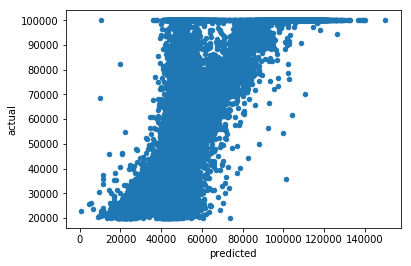

In [49]:
predicted_df.plot('predicted', 'actual',kind = 'scatter')
plt.show()

### Performance
Ridge With days adjustment and with bank_salary_credit_amount and sum/count variables 
RMSE for test is 40840.604
MAE for test is 20875.769

Ridge Without days adjustment and with bank_salary_credit_amount and sum/count variables 
RMSE for test is 42840.868660496
MAE for test is 22588.792029123077

Ridge with days adjustment and all variables
RMSE for test is 39585.497
MAE for test is 20094.249